# GE 461 First Project 

In [117]:
import numpy as np
import pandas as pd
from matplotlib .pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats. outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ( ModelSpec as MS ,
summarize ,poly)
import seaborn as sns


In [ ]:
Auto = load_data('Auto')
print(Auto.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [ ]:
print(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


### First Part of Assignment 

In [120]:
X = pd.DataFrame({
    'intercept' : np.ones(Auto.shape[0]),
    'horsepower': Auto['horsepower']
})


In [121]:
y = Auto['mpg']
model = sm.OLS(y,X)
results = model.fit()

In [ ]:
print(summarize(results))

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [123]:

new_df = pd.DataFrame({'intercept' :1,'horsepower': [98]})

prediction = results.get_prediction(new_df)
mean = prediction.predicted_mean

conf_interval = prediction.conf_int(alpha=0.05)
pred_interval = prediction.conf_int(obs= True, alpha=0.05)

print("Result: " + str(mean[0]))
print("Confidence Interval:",  conf_interval)
print("Prediction Interval:", pred_interval)

Result: 24.46707715251242
Confidence Interval: [[23.97307896 24.96107534]]
Prediction Interval: [[14.80939607 34.12475823]]


In [124]:
def predicted(b,m,x):
    y = m * x + b
    print(f'{y:.3f}')
    return y

calculated_result = predicted(results.params [0],results.params [1],98)

24.467


/var/folders/th/2qxlqnss15b01gp33j9sym0r0000gn/T/ipykernel_36178/651822026.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calculated_result = predicted(results.params [0],results.params [1],98)


In [ ]:
print(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           7.03e-81
Time:                        18:23:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
def abline(ax, b,m,*args,**kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim , *args , ** kwargs)
   

/var/folders/th/2qxlqnss15b01gp33j9sym0r0000gn/T/ipykernel_36178/393658913.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params [0],
/var/folders/th/2qxlqnss15b01gp33j9sym0r0000gn/T/ipykernel_36178/393658913.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params [1],


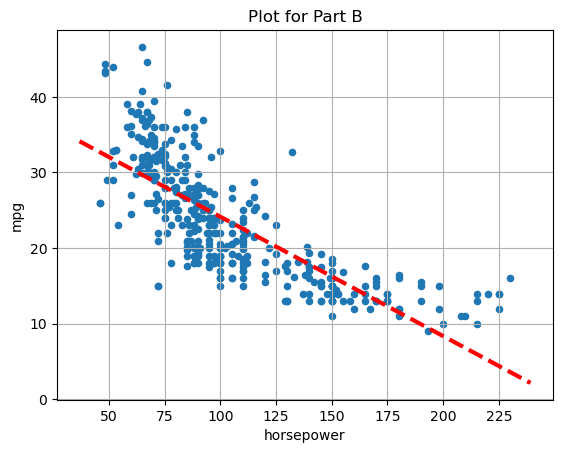

In [11]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax ,
results.params [0],
results.params [1],
'r--',
linewidth =3)
ax.set_title("Plot for Part B")
ax.grid()


Text(0.5, 1.0, 'Residual versus Fitted Value ')

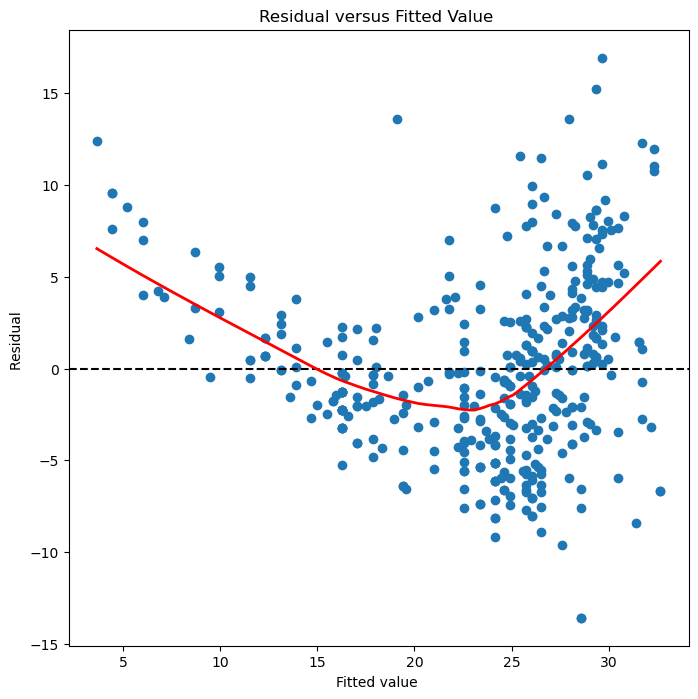

In [110]:
ax = subplots (figsize =(8 ,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel ('Fitted value ')
ax.set_ylabel ('Residual ')
ax.axhline (0, c='k', ls='--')
# Compute a LOWESS smoothed curve of the residuals
lowess_smoothed = sm.nonparametric.lowess(results.resid, results.fittedvalues, frac=0.8)

# Add the smooth curve to the plot
ax.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', linewidth=2)
ax.set_title('Residual versus Fitted Value ')

Text(0.5, 1.0, 'Index versus Leverage')

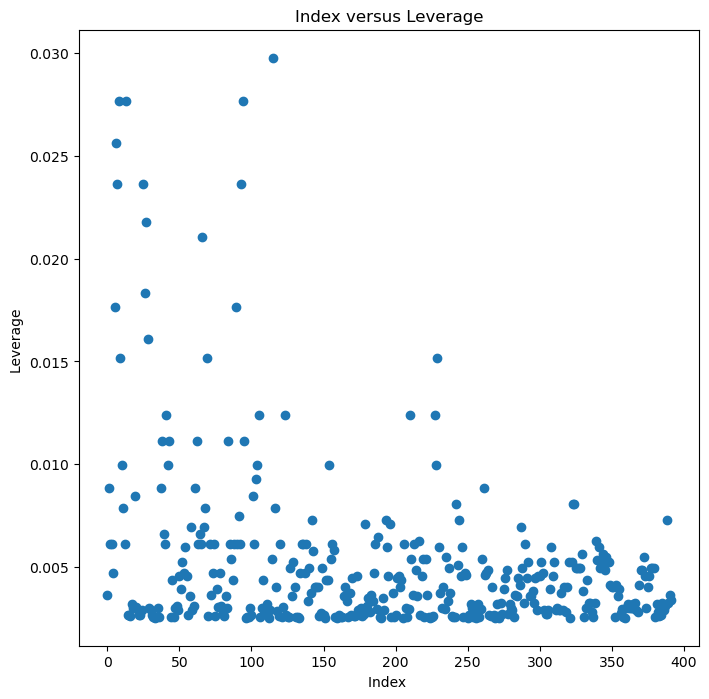

In [13]:
infl = results. get_influence ()
ax = subplots (figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape [0]) , infl. hat_matrix_diag )
ax.set_xlabel ('Index ')
ax.set_ylabel ('Leverage ')
np.argmax(infl. hat_matrix_diag )
ax.set_title('Index versus Leverage')

### Second Part of Assignment 

Text(0.5, 0.98, 'Scatterplot Matrix of All Variables')

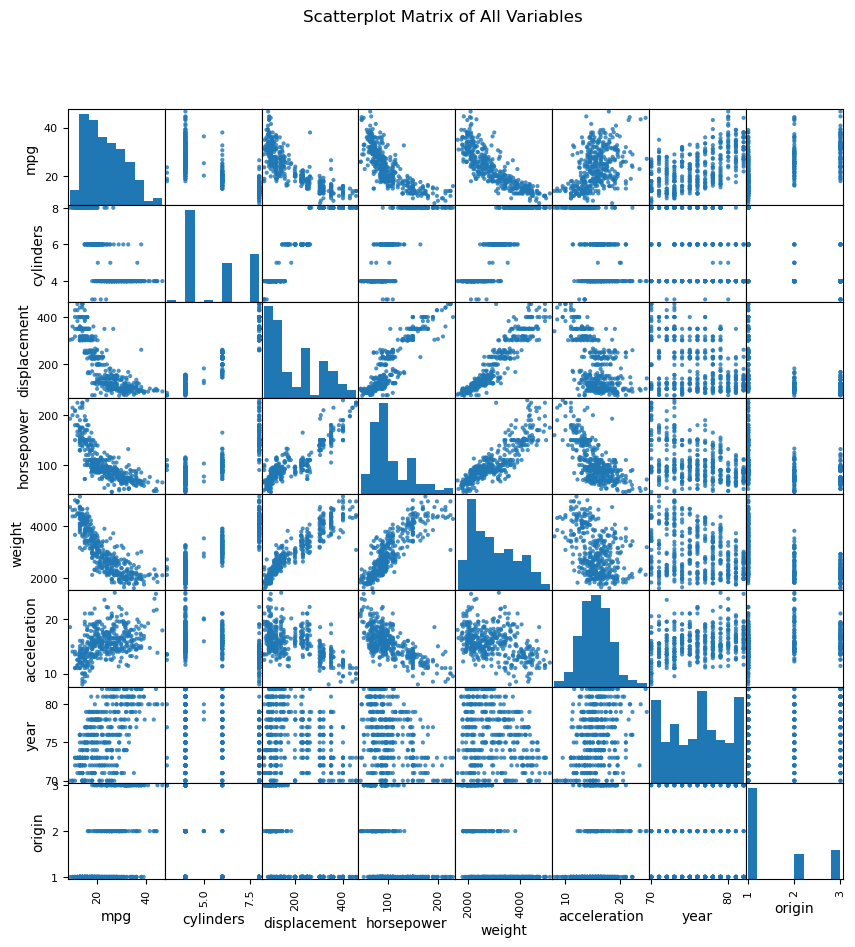

In [14]:
# A part

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(Auto, alpha=0.8, figsize=(10, 10), diagonal='hist')
plt.suptitle("Scatterplot Matrix of All Variables")

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

Text(0.5, 1.0, 'Correlation Matrix')

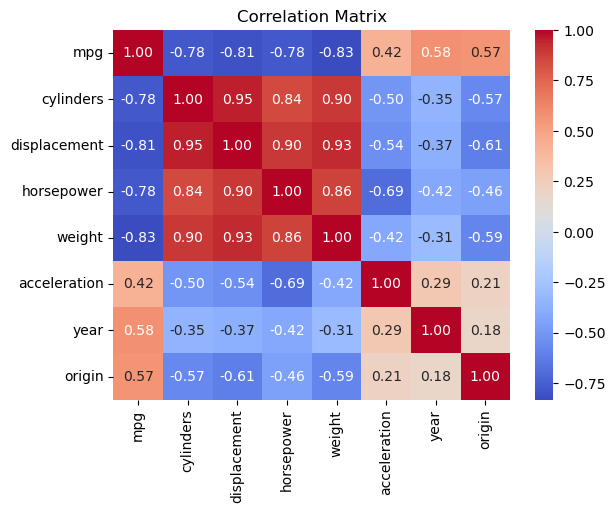

In [111]:
# B part
result_corr = Auto.corr()
print(result_corr)

sns.heatmap(result_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

In [112]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [113]:
terms = Auto.columns.drop('mpg')
terms

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [ ]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

# Fit the model using the formula interface (excluding 'name')
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
model2 = smf.ols(formula, data=Auto)
result_mul= model2.fit()
print(summarize(result_mul))

,coef,std err,t,P>|t|
Intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [ ]:
print(anova_lm(result_mul))

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


## Part D

Text(0.5, 1.0, 'Residual versus Fitted Value ')

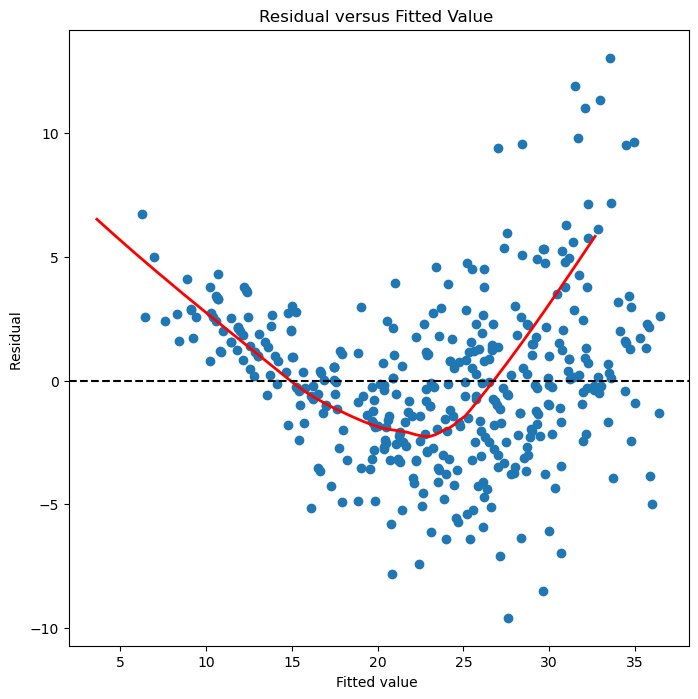

In [116]:

ax = subplots (figsize =(8 ,8))[1]
ax.scatter(result_mul.fittedvalues , result_mul.resid)
ax.set_xlabel ('Fitted value ')
ax.set_ylabel ('Residual ')
# Compute a LOWESS smoothed curve of the residuals
lowess_smoothed = sm.nonparametric.lowess(results.resid, results.fittedvalues, frac=0.8)

# Add the smooth curve to the plot
ax.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', linewidth=2)
ax.axhline (0, c='k', ls='--')
ax.set_title('Residual versus Fitted Value ')

Text(0.5, 1.0, 'Leverage versus Index')

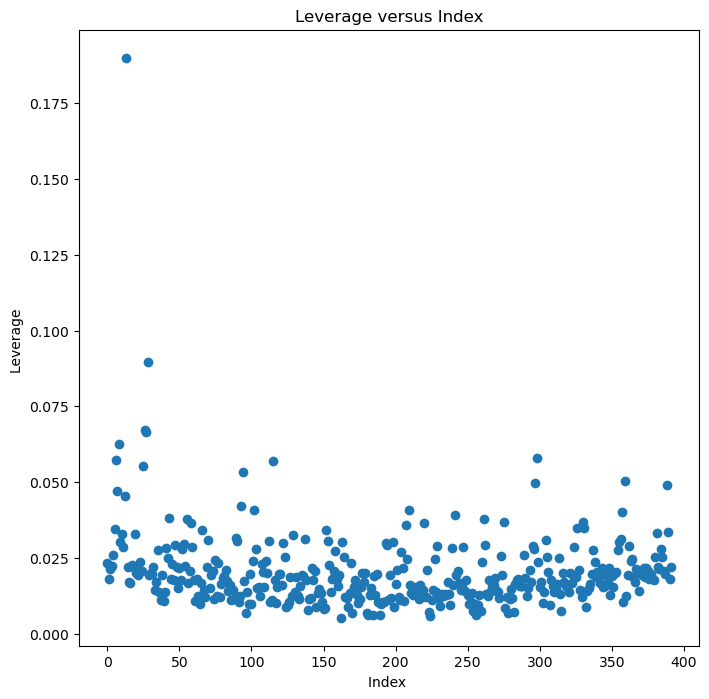

In [21]:
infl = result_mul.get_influence ()
ax = subplots (figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape [0]) , infl. hat_matrix_diag )
ax. set_xlabel ('Index ')
ax. set_ylabel ('Leverage ')
np.argmax(infl.hat_matrix_diag )
ax.set_title('Leverage versus Index')

# Part E

In [ ]:
# Part E
allvars = Auto.columns.drop('mpg')
y = Auto['mpg']
X_alternative_1 = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin', ('year', 'origin')]).fit_transform(Auto)

model_alternative = sm.OLS(y, X_alternative_1)
results_alternative = model_alternative.fit()
summarize(results_alternative)

Index(['intercept', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'year:origin'],
      dtype='object')


,coef,std err,t,P>|t|
intercept,8.4915,9.044,0.939,0.348
cylinders,-0.5042,0.319,-1.579,0.115
displacement,0.0157,0.008,2.081,0.038
horsepower,-0.0140,0.014,-1.025,0.306
weight,-0.0064,0.001,-9.851,0.000
acceleration,0.0918,0.098,0.941,0.348
year,0.4189,0.113,3.723,0.000
origin,-14.0456,4.699,-2.989,0.003
year:origin,0.1989,0.060,3.298,0.001


In [54]:
# Part E
X_alternative_2 = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin', ('displacement', 'acceleration'), ('weight', 'origin')]).fit_transform(Auto)
y = Auto['mpg']
model_alternative2 = sm.OLS(y, X_alternative_2)
results_alternative2 = model_alternative2.fit()
summarize(results_alternative2)

,coef,std err,t,P>|t|
intercept,-36.4267,4.911,-7.417,0.000
cylinders,-0.0936,0.307,-0.304,0.761
displacement,0.0585,0.010,5.685,0.000
horsepower,-0.0481,0.014,-3.460,0.001
weight,-0.0010,0.001,-0.918,0.359
acceleration,0.6902,0.132,5.245,0.000
year,0.7826,0.047,16.560,0.000
origin,5.7569,1.201,4.795,0.000
displacement:acceleration,-0.0047,0.001,-6.922,0.000
weight:origin,-0.0021,0.001,-4.011,0.000


In [45]:
# Part E
X_alternative_3 = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin', ('cylinders', 'acceleration')]).fit_transform(Auto)

model_alternative3 = sm.OLS(y, X_alternative_3)
results_alternative3 = model_alternative3.fit()
summarize(results_alternative3)

,coef,std err,t,P>|t|
intercept,-34.2416,5.741,-5.964,0.000
cylinders,2.9398,0.781,3.764,0.000
displacement,0.0086,0.008,1.122,0.263
horsepower,-0.0380,0.014,-2.697,0.007
weight,-0.0052,0.001,-7.653,0.000
acceleration,1.0967,0.232,4.719,0.000
year,0.7654,0.050,15.412,0.000
origin,1.2687,0.272,4.657,0.000
cylinders:acceleration,-0.2141,0.045,-4.802,0.000


## Part F

In [178]:
#F
# log result 
formula_log = 'mpg ~  np.log10(cylinders)+ np.log10(displacement) + horsepower+ np.log(horsepower) + np.log(weight) + np.log10(acceleration) + year + np.log10(origin)'
model_log = smf.ols(formula_log, data=Auto)
results_log = model_log.fit()
results_log.summary()
print(results_log.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     305.0
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          5.69e-161
Time:                        19:45:18   Log-Likelihood:                -969.66
No. Observations:                 392   AIC:                             1957.
Df Residuals:                     383   BIC:                             1993.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                154

In [177]:
print(anova_lm(result_mul, results_log ))

   df_resid          ssr  df_diff      ss_diff          F        Pr(>F)
0     384.0  4252.212530      0.0          NaN        NaN           NaN
1     383.0  3231.194158      1.0  1021.018373  121.02338  1.201179e-24


In [179]:
# square result
formula_square = 'mpg ~ np.power(cylinders,2)+ displacement + horsepower + weight + np.power(acceleration,2) + np.power(horsepower,2)  + year + origin'
model_square = smf.ols(formula_square, data=Auto)
results_square = model_square.fit()
print(results_square.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     281.8
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          2.50e-155
Time:                        19:50:14   Log-Likelihood:                -982.99
No. Observations:                 392   AIC:                             1984.
Df Residuals:                     383   BIC:                             2020.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [180]:
print(anova_lm(result_mul, results_square ))

   df_resid          ssr  df_diff     ss_diff          F        Pr(>F)
0     384.0  4252.212530      0.0         NaN        NaN           NaN
1     383.0  3458.652357      1.0  793.560174  87.876293  6.175863e-19


In [ ]:
formula_square_root = 'mpg ~ np.sqrt(cylinders)+ np.sqrt(horsepower)+ np.sqrt(weight) + acceleration+ np.sqrt(acceleration) + np.sqrt(displacement)  + year + origin '
model_square_root = smf.ols(formula_square_root, data=Auto)
results_square_root = model_square_root.fit()
print(results_square_root.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     262.7
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          2.21e-150
Time:                        19:39:20   Log-Likelihood:                -994.68
No. Observations:                 392   AIC:                             2007.
Df Residuals:                     383   BIC:                             2043.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                84.83

In [181]:
print(anova_lm(result_mul, results_square_root ))

   df_resid          ssr  df_diff     ss_diff          F        Pr(>F)
0     384.0  4252.212530      0.0         NaN        NaN           NaN
1     383.0  3671.143395      1.0  581.069135  60.621298  6.532605e-14
